In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 1.import data

In [4]:
data_set=pd.read_csv('C:\\Users\\User\\100-Days-Of-ML-Code-master\\datasets\\Social_Network_Ads.csv')
data_set.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
data_set2=data_set.iloc[:,2:]
data_set2.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


# 2.data preprocessing

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [10]:
x1x2=StandardScaler().fit_transform(data_set2.iloc[:,:-1])
data_set2.iloc[:,:-1]=x1x2

C:\Users\User\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\User\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [11]:
data_set2.head()

,Age,EstimatedSalary,Purchased
0,-1.781797,-1.490046,0
1,-0.253587,-1.460681,0
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,0


In [15]:
x_train,x_test,y_train,y_test=train_test_split(data_set2.iloc[:,:-1],data_set2.iloc[:,-1],test_size=0.3,random_state=0)

# 3.model fitting

In [13]:
from sklearn.linear_model import LogisticRegression

In [16]:
model_jmda=LogisticRegression()

In [17]:
model_jmda.fit(x_train,y_train)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
model_jmda.score(x_train,y_train),model_jmda.score(x_test,y_test)

(0.8357142857142857, 0.875)

# 4.Visualization

In [25]:
x1=np.linspace(data_set2['Age'].min(),data_set2['Age'].max(),500)
x2=np.linspace(data_set2['EstimatedSalary'].min(),data_set2['EstimatedSalary'].max(),500)
X1,X2=np.meshgrid(x1,x2)
grid_x=np.concatenate([X1.reshape(-1,1),X2.reshape(-1,1)],axis=1)
grid_y=model_jmda.predict(grid_x).reshape(-1,1)
grid=np.concatenate([grid_x,grid_y],axis=1)
gridframe=pd.DataFrame(data=grid,columns=['Age','EstimatedSalary','Purchased'])
gridframe.head()

,Age,EstimatedSalary,Purchased
0,-1.877311,-1.607506,0.0
1,-1.869271,-1.607506,0.0
2,-1.861232,-1.607506,0.0
3,-1.853193,-1.607506,0.0
4,-1.845154,-1.607506,0.0


Text(0.5, 1.0, 'Linear-logistic fitting')

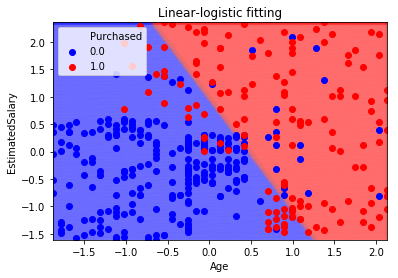

In [32]:
sns.scatterplot(data=gridframe,x='Age',y='EstimatedSalary',hue='Purchased',palette=['blue','red'],alpha=0.05)
plt.scatter(x=data_set2['Age'][data_set2['Purchased']==0],y=data_set2['EstimatedSalary'][data_set2['Purchased']==0],color='blue')
plt.scatter(x=data_set2['Age'][data_set2['Purchased']==1],y=data_set2['EstimatedSalary'][data_set2['Purchased']==1],color='red')
plt.xlim(data_set2['Age'].min(),data_set2['Age'].max())
plt.ylim(data_set2['EstimatedSalary'].min(),data_set2['EstimatedSalary'].max())
plt.title('Linear-logistic fitting')